# Abaikan

In [1]:
from functools import wraps
from time import time

def measure(func):
    @wraps(func)
    def _time_it(*args, **kwargs):
        start = int(round(time() * 1000))
        try: return func(*args, **kwargs)
        finally:
            end_ = int(round(time() * 1000)) - start
            minutes, seconds = divmod(end_ / 1000, 60)
            print(f"Total execution time: {int(minutes)} min {int(seconds)} sec")
    return _time_it

# Kisi - Kisi (Pak Yozef)

## 1. Invers Multiplikatif

### Diberikan a dan n. Hitunglah invers multiplikatif dari a dalam modulo n, jika eksis.

In [2]:
from math import nan,gcd

def find_mult_inverse(k, n):
  if gcd(k,n) != 1: return -1

  a = [nan, k]
  b = [nan, n]
  q = [nan, k//n]
  r = [nan, k%n]
  s = [1, 0]
  t = [0, 1]

  i = 1
  while (r[i]!=0):
    i+=1
    a.append(b[i-1])
    b.append(r[i-1])
    q.append(a[i] // b[i])
    r.append(a[i] % b[i])
    s_formula = s[i-2] - s[i-1]*q[i-1]
    s.append(s_formula)
    t_formula = t[i-2] - t[i-1]*q[i-1]
    t.append(t_formula)
    
  return s[i]%n

### Find Mult Inverse Test Cases

In [3]:
k_list = [5,10,21,3,7,-8,15,11,-14,-20,30,-35,40,-50,60,-70,-80,90,-100]
n_list = [7,6,35,2,11,4,10,17,12,25,8,14,24,35,55,75,95,115,200]
should_return_mult_inverse_list = [3,-1,-1,1,8,-1,-1,14,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]

for k,n,check in zip(k_list,n_list,should_return_mult_inverse_list):
    mult_inverse = find_mult_inverse(k,n)
    assert mult_inverse == check

### Tugas Komputasi Nomor 1

In [4]:
P = 1000000007
Q1_SHOULD_RETURN = 148059137

@measure
def solve_1(P):
  total = 0

  for k in range(345678, 987654+1):
    inv = find_mult_inverse(k, P)
    total += inv

  print(total % P)
  assert total % P == Q1_SHOULD_RETURN

solve_1(P)

148059137
Total execution time: 0 min 4 sec


## 2. Aritmatika GF (2^8)

### Implementasikan trik perkalian pada GF(2^8)

In [5]:
def GF_addition(a, b):
    a_int = int(a,2)
    b_int = int(b,2)
    output = a_int ^ b_int
    return bin(output)[2:].zfill(8)

def GF_multiply_by_x(P):
    mod = "00011011"
    mod_integer_rep = int(mod,2)
    T = P[1:]+'0'
    T_integer_rep = int(T,2)
    return T if P[0] == '0' else (bin(T_integer_rep^mod_integer_rep)[2:].zfill(8))

def GF_multiply_by_x_k(P, k):
    if k == 0: return P
    return GF_multiply_by_x_k(GF_multiply_by_x(P),k-1)

def GF_multiply(P, Q):
    T = []
    for i in range(8):
        if Q[i] == '1': T.append(GF_multiply_by_x_k(P,7-i))
    output = ""
    result = int(T[0], 2)
    for i in T[1:]: result ^= int(i, 2)
    output = bin(result)[2:].zfill(8)
    return (output)

def convert_hexa_to_binary(hexa): return bin(int(hexa, 16))[2:].zfill(8)

def convert_binary_to_hexa(bin): return (hex(int(bin, 2))[2:]).upper()

### GF 2^8 Multiplication Test

In [6]:
binary_list_1 = ['11000011', '10110101', '10110001', '10001110', '00011000', '11001101', '01110011', '00011011', '00101001', '10101101', '11001100', '10100010', '01100101', '00001101', '01111101', '10010000', '11101001', '10010110', '10111010', '11100010', '00100101', '01110000', '11010101', '00010011', '11101001', '01001010', '00001100', '00011101', '10100110', '00010011', '10010110', '11000110', '10000010', '01011100', '00110101', '11111101', '01111101', '11001001', '11001010', '00101001', '01101000', '10100111', '11100110', '10100000', '10111011', '10110100', '01000111', '00011001', '00001000', '01010100', '00011110', '01100001', '10110101', '11001010', '11001101', '00110111', '01010000', '01010111', '11101100', '01000111', '00000001', '01001101', '00100100', '01111101', '00010001', '11010000', '10110110', '00000101', '11001001', '10001111', '01011111', '10010010', '00100011', '00100000', '11001011', '00001100', '00011111', '01010011', '01000111', '11111010', '00100011', '00010110', '00000110', '00010111', '00000011', '11111110', '11000100', '00100000', '01000010', '11000101', '01100001', '10100000', '11101110', '11111111', '01111101', '11101111', '11000100', '00111001', '10110010', '00011111']

binary_list_2 = binary_list_1[::-1]

assert binary_list_1 != binary_list_2

multiply_should_return = ['10111001', '11011010', '01111010', '00110101', '01001011', '11000001', '00011110', '01111010', '00010000', '00101001', '10010111', '01001010', '00010100', '10000011', '11101110', '10101011', '10111011', '01011001', '11100100', '01100010', '01001101', '01010100', '01001010', '11001010', '10000000', '10011111', '10011011', '10101010', '11000101', '01100110', '01111100', '00101011', '10111100', '11011110', '01010111', '10110100', '10001101', '01000001', '10010101', '00101001', '01000110', '00010000', '11000011', '01111011', '11000011', '10111000', '00010000', '11001111', '00100101', '01000010', '01000010', '00100101', '11001111', '00010000', '10111000', '11000011', '01111011', '11000011', '00010000', '01000110', '00101001', '10010101', '01000001', '10001101', '10110100', '01010111', '11011110', '10111100', '00101011', '01111100', '01100110', '11000101', '10101010', '10011011', '10011111', '10000000', '11001010', '01001010', '01010100', '01001101', '01100010', '11100100', '01011001', '10111011', '10101011', '11101110', '10000011', '00010100', '01001010', '10010111', '00101001', '00010000', '01111010', '00011110', '11000001', '01001011', '00110101', '01111010', '11011010', '10111001']

for bin1,bin2,bin_ in zip(binary_list_1,binary_list_2,multiply_should_return):
    gf_mult = GF_multiply(bin1,bin2)
    assert gf_mult == bin_

### Tugas Komputasi Nomor 3

In [7]:
def GF_multiply_p_k_times(p,k):
    result = p
    for _ in range(k-1): result = GF_multiply(p,result)
    return result

@measure
def solve_3():
    a = convert_hexa_to_binary("0F")
    b = convert_hexa_to_binary("BE")
    c = convert_hexa_to_binary("DA")

    zero_f_200 = GF_multiply_p_k_times(a,200)
    be_100 = GF_multiply_p_k_times(b,100)
    da_50 = GF_multiply_p_k_times(c,50)

    poly_kiri = GF_multiply(zero_f_200,be_100)
    poly_kanan = GF_multiply(zero_f_200,da_50)

    res = GF_addition(poly_kiri,poly_kanan)
    hexa_output = convert_binary_to_hexa(res)
    print(hexa_output)

solve_3()

DC
Total execution time: 0 min 0 sec


### Menghitung Invers Multiplikatif dari GF (2^8)

In [8]:
def discrete_log(a, b, n):
    # a^k == b (mod n)
    k = 1
    for i in range(n):
        k = (k * a) % n
        if k == b: return i + 1
    
    # Inverse doesn't exist
    return 0

### Tugas Komputasi Nomor 2

In [9]:
@measure
def solve_2():
    n_range = range(4567,8765+1)
    a_range = range(2,10+1)
    b = 103

    not_found_inverse = 0
    sum_inverse = 0

    for n in n_range:
        for a in a_range:
            inverse_mult = discrete_log(a,b,n)
            if inverse_mult != 0: sum_inverse+=discrete_log(a,b,n)
            else: not_found_inverse+=1
    print(sum_inverse)
    print(not_found_inverse) 

solve_2()

8101199
32486
Total execution time: 0 min 10 sec


## 4. Tranposition Block

### Diberikan suatu permutasi sebagai aturan transposition Block. Temukan invers dari permutasi tersebut dan lakukan proses dekripsi.

In [10]:
# n-bit transposition block

# permutasi didefinisikan sebagai pemetaan i --> key[i]

# ini yang dari template ipynb bapaknya
n = 8
key = [3, 5, 7, 1, 0, 2, 4, 6]
assert sorted(key) == list(range(n))
assert len(key) == n

# ini yang dari onenote Kriptografi Simetris 1.3 
n2 = 5
key2 = [3,0,4,2,1]
assert len(key2) == n2
assert sorted(key2) == list(range(n2))

def encrypt_transposition(n, m, k):
  # n berupa bilangan bulat positif
  # key k berupa tabel indeks berukuran n yang berisikan {0, 1, ... , n-1}
  # text m berupa n-bit string
  
  # write your code here
  encrypt_bits = [""]*n
  for i,j in enumerate(k): encrypt_bits[j] = m[i]
  return "".join(encrypt_bits)

# test case dari template ipynb bapaknya
plaintextbit = "01010101"
ciphertext = encrypt_transposition(n, plaintextbit, key)
assert ciphertext == "01100110"
print(ciphertext,'ciphertext ipynb') # this should output 01100110

# test case 1 dari onenote Kriptografi Simetris 1.3 
plaintextbit_onenote = "01001"
ciphertext_onenote = encrypt_transposition(n2, plaintextbit_onenote, key2)
assert ciphertext_onenote == "11000"
print(ciphertext_onenote,'ciphertext onenote test case 1') # this should output 11000

# test case 2 dari onenote Kriptografi Simetris 1.3 
plaintextbit_onenote_2 = "11010"
ciphertext_onenote_2 = encrypt_transposition(n2, plaintextbit_onenote_2, key2)
assert ciphertext_onenote_2 == "10110"
print(ciphertext_onenote_2,'ciphertext onenote test case 2')  # this should output 10110

def decrypt_transposition(n, c, k):
  # n berupa bilangan bulat positif
  # key k berupa tabel indeks berukuran n yang berisikan {0, 1, ... , n-1}
  # ciphertext c berupa n-bit string
  
  # write your code here
  decrypt_bits = [""]*n
  for i,j in enumerate(k): decrypt_bits[i] = c[j]
  return "".join(decrypt_bits)

# test case dari template ipynb bapaknya
ori_message = decrypt_transposition(n, ciphertext, key)
print(ori_message,'plaintext ipynb') # this should output 01010101
assert ori_message == "01010101"

# test case 1 dari onenote Kriptografi Simetris 1.3 
ori_message_1 = decrypt_transposition(n2, ciphertext_onenote, key2)
print(ori_message_1,'plaintext onenote test case 1') # this should output 01001
assert ori_message_1 == "01001" 

# test case 2 dari onenote Kriptografi Simetris 1.3 
ori_message_2 = decrypt_transposition(n2, ciphertext_onenote_2, key2)
print(ori_message_2,'plaintext onenote test case 2') # this should output 11010
assert ori_message_2 == "11010" 

01100110 ciphertext ipynb
11000 ciphertext onenote test case 1
10110 ciphertext onenote test case 2
01010101 plaintext ipynb
01001 plaintext onenote test case 1
11010 plaintext onenote test case 2


## 5. Substitution Block

### Diberikan suatu contoh plaintext dan ciphertext. Temukan kunci dari aturan substitution block, dan lakukan proses enkripsi.

In [11]:
# meretas n-bit substitution block

# test case dari ipynb bapaknya
n = 3 # 1 blok substitusi berukuran n
plaintext_breach = "111001100101010000110011"
ciphertext_breach = "101001011100010111110000"

# test case 1 dari onenote bapaknya
n2 = 2
plaintext_breach_2 = "010011"
ciphertext_breach_2 = "101101"

plaintext_breach_3 = "110110"
ciphertext_breach_3 = "011000"

def obtain_key_substitution_block(n, m, c):
  # return a dictionary defining the substitution rules
  # m is the plaintext
  # c is the ciphertext
  
  # write your code here
  d = {}
  for i in range(0,len(m),n): d[m[i:i+n]] = c[i:i+n]
  return d

# key berupa dictionary yang menerjemahkan n-bit menjadi n-bit

# this should output {'111': '101', '001': '001', '100': '011', '101': '100', '010': '010', '000': '111', '110': '110', '011': '000'}
key = obtain_key_substitution_block(n, plaintext_breach, ciphertext_breach)
print(key)

# this should output {'01': '10', '00': '11', '11': '01'}
key2 = obtain_key_substitution_block(n2, plaintext_breach_2, ciphertext_breach_2)
print(key2)

# this should output {'11': '01', '01': '10', '10': '00'}
key3 = obtain_key_substitution_block(n2, plaintext_breach_3, ciphertext_breach_3)
print(key3)

assert key == {'111': '101', '001': '001', '100': '011', '101': '100', '010': '010', '000': '111', '110': '110', '011': '000'}

assert key2 == {'01': '10', '00': '11', '11': '01'}

assert key3 == {'11': '01', '01': '10', '10': '00'}

def encrypt_substitution(n, m, key):
  # m is the plaintext

  # write your code here
  ciphertext = ""
  for i in range(0,len(m),n): ciphertext+=key[m[i:i+n]]
  return ciphertext

# test case dari ipynb bapaknya
plaintext = "110001010010001101100100100111001011111101"
ciphertext = encrypt_substitution(n, plaintext, key)
print(ciphertext) # this should output 110001010010001100011011011101001000101100
assert ciphertext == "110001010010001100011011011101001000101100"

# test case 1 dari onenote bapaknya
plaintext_2 = "010011"
ciphertext_2 = encrypt_substitution(n2, plaintext_2, key2)
print(ciphertext_2) # this should output 101101
assert ciphertext_2 == "101101"

# test case 2 dari onenote bapaknya
plaintext_3 = "110110"
ciphertext_3 = encrypt_substitution(n2, plaintext_3, key3)
print(ciphertext_3) # this should output 011000
assert ciphertext_3 == "011000"

{'111': '101', '001': '001', '100': '011', '101': '100', '010': '010', '000': '111', '110': '110', '011': '000'}
{'01': '10', '00': '11', '11': '01'}
{'11': '01', '01': '10', '10': '00'}
110001010010001100011011011101001000101100
101101
011000


## 6. XOR-Whitener

### Diberikan suatu block key-whitener, implementasikan proses enkripsi.

In [12]:
# n-bit key whitening

n = 8
# key berupa n-bit string
key = "10101001"

def encrypt_key_whitener(n, m, k):
  # m is the plain text
  # k is the key

  # write your code here
  ciphertextbit = ""
  key_integer = int(k,2)
  for i in range(0,len(m),n):
    bit = m[i:i+n]
    bit_integer = int(bit,2)
    xor = bit_integer^key_integer
    xor_binary = bin(xor)[2:].zfill(8)
    ciphertextbit+=xor_binary
  return ciphertextbit

# test case dari ipynb bapaknya
plaintextbit = "11010101100101000001010111101010"
ciphertextbit = encrypt_key_whitener(n, plaintextbit, key)
print(ciphertextbit) # this should output "01111100001111011011110001000011"
assert ciphertextbit == "01111100001111011011110001000011"

# test case dari onenote bapaknya
def letter_to_binary(letter): return bin(ord(letter))[2:].zfill(8)
def binary_to_letter(binary): return chr(int(binary,2))

def convert_word_to_binary(word):
  binary = ""
  for letter in word: binary+=letter_to_binary(letter)
  return binary

ciphertext_string = "WMA"
key_string = "MEH"
ciphertext_binary = convert_word_to_binary(ciphertext_string)
key_binary = convert_word_to_binary(key_string)

assert "010101110100110101000001" == ciphertext_binary 
assert "010011010100010101001000" == key_binary

def decrypt_key_whitener_onenote(n, m, k):
  # m is the plain text
  # k is the key

  # write your code here
  decryptbit_list = []
  for i in range(0,len(m),n):
    bit = m[i:i+n]
    key = k[i:i+n]
    key_integer = int(key,2)
    bit_integer = int(bit,2)
    xor = bit_integer^key_integer
    xor_binary = bin(xor)[2:].zfill(8)
    decryptbit_list.append(xor_binary)
  
  decrypt_message = ""
  print(decryptbit_list,'AAAAA')
  for binary in decryptbit_list: decrypt_message+=binary_to_letter(binary)
  print(decrypt_message,'asdjasd')

  return decrypt_message

plaintext_output = decrypt_key_whitener_onenote(n,ciphertext_binary,key_binary)
print(plaintext_output,"asoidjaiosjd")
# assert "000110100000100000001001" == plaintext_output

01111100001111011011110001000011
['00011010', '00001000', '00001001'] AAAAA
	 asdjasd
	 asoidjaiosjd


## 7. DES: Implementasi Round S-Box

### Diberikan tabel S-box, implementasikan proses S-box untuk suatu blok 6-bit

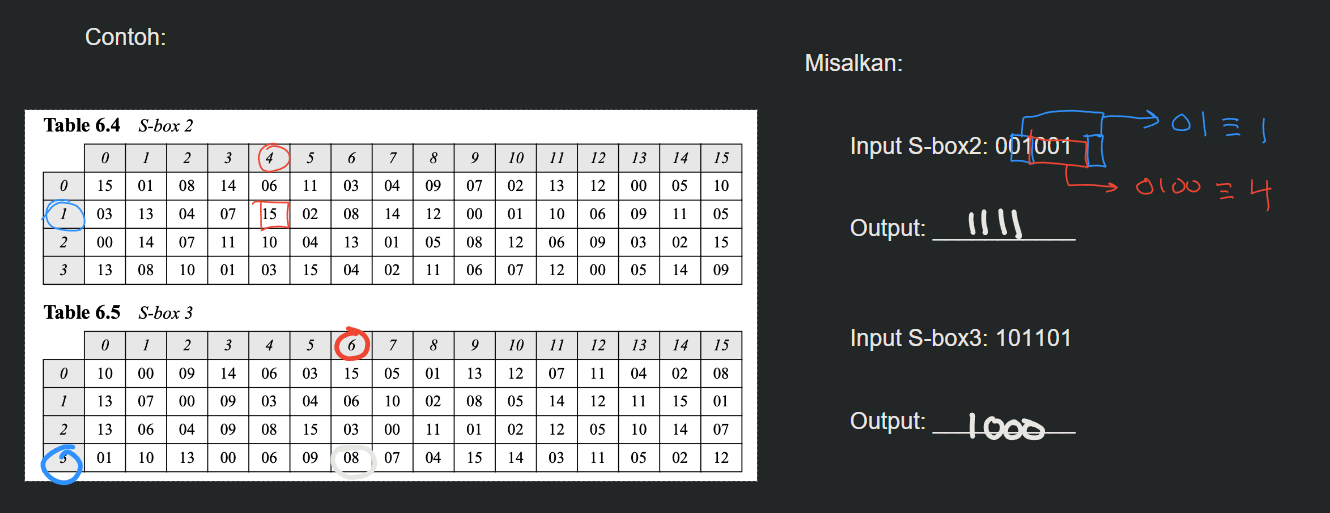

In [13]:
def get_row_column_from_round_s_box(binary:str):
    row = binary[0]+binary[-1]
    col = binary[1:-1]
    return int(row,2),int(col,2)

inputs = ["001001","101101"]
should_return = [(1,4),(3,6)]
for binary,check in zip(inputs,should_return): 
    output = get_row_column_from_round_s_box(binary)
    print(output)
    assert output == check

(1, 4)
(3, 6)


## 8. DES: Implementation KeyGeneration - Shift Left

### Diberikan hasil proses keygeneration dari suatu round, implementasikan proses shift left key untuk round berikutnya.

In [14]:
def shift_left_key_generation(binary,shift): return binary[shift:]+binary[:shift]
input_ = "01011001"
shift = 2
output = shift_left_key_generation(input_,shift)
print(output)
assert "01100101" == output

01100101


## 11. AES: Round Implementasi Mix Column

### Diberikan suatu state, implementasikan hasil Mix Column 

In [15]:
def convert_hexa_matrix_to_binary(matrix):
    output_matrix = []
    for row in matrix:
        temp = []
        for col in row:
            temp.append(convert_hexa_to_binary(col))
        output_matrix.append(temp)
    return output_matrix

def convert_integer_matrix_to_hexa(matrix):
    output_matrix = []
    for row in matrix:
        temp = []
        for col in row:
            temp.append(hex(col)[2:].zfill(2).upper())
        output_matrix.append(temp)
    return output_matrix

def mix_column(state ,C):
    result = [[0]*len(state[0]) for _ in range(len(C))]
    state = convert_hexa_matrix_to_binary(state)
    C = convert_hexa_matrix_to_binary(C)

    for i in range(len(C)):
        for j in range(len(state[0])):
            for k in range(len(state)):
                result[i][j] ^= int(GF_multiply(C[i][k],state[k][j]),2)

    return convert_integer_matrix_to_hexa(result)

state = [
    ["63","C9","FE","30"],
    ["F2","63","26","F2"],
    ["7D","D4","C9","C9"],
    ["D4","FA","63","82"]
]

C = [
    ["02","03","01","01"],
    ["01","02","03","01"],
    ["01","01","02","03"],
    ["03","01","01","02"],
]

mix_column_output = mix_column(state,C)
print(mix_column_output)

[['62', '02', '27', '26'], ['CF', '92', '91', '0D'], ['0C', '0C', 'F4', 'D6'], ['99', '18', '30', '74']]


## 12. AES: Key Expansion - Implementasi

### Diberikan round key untuk suatu round, tentukan round key untuk round berikutnya

![Alt text](../../../../../../../C:/Users/chris/Kuliah/semester6/KK/uts/key_expansion.png)

semoga bagian ini sama aes sbox nya

In [28]:
aes_sbox = [
    [int('63', 16), int('7c', 16), int('77', 16), int('7b', 16), int('f2', 16), int('6b', 16), int('6f', 16), int('c5', 16), int(
        '30', 16), int('01', 16), int('67', 16), int('2b', 16), int('fe', 16), int('d7', 16), int('ab', 16), int('76', 16)],
    [int('ca', 16), int('82', 16), int('c9', 16), int('7d', 16), int('fa', 16), int('59', 16), int('47', 16), int('f0', 16), int(
        'ad', 16), int('d4', 16), int('a2', 16), int('af', 16), int('9c', 16), int('a4', 16), int('72', 16), int('c0', 16)],
    [int('b7', 16), int('fd', 16), int('93', 16), int('26', 16), int('36', 16), int('3f', 16), int('f7', 16), int('cc', 16), int(
        '34', 16), int('a5', 16), int('e5', 16), int('f1', 16), int('71', 16), int('d8', 16), int('31', 16), int('15', 16)],
    [int('04', 16), int('c7', 16), int('23', 16), int('c3', 16), int('18', 16), int('96', 16), int('05', 16), int('9a', 16), int(
        '07', 16), int('12', 16), int('80', 16), int('e2', 16), int('eb', 16), int('27', 16), int('b2', 16), int('75', 16)],
    [int('09', 16), int('83', 16), int('2c', 16), int('1a', 16), int('1b', 16), int('6e', 16), int('5a', 16), int('a0', 16), int(
        '52', 16), int('3b', 16), int('d6', 16), int('b3', 16), int('29', 16), int('e3', 16), int('2f', 16), int('84', 16)],
    [int('53', 16), int('d1', 16), int('00', 16), int('ed', 16), int('20', 16), int('fc', 16), int('b1', 16), int('5b', 16), int(
        '6a', 16), int('cb', 16), int('be', 16), int('39', 16), int('4a', 16), int('4c', 16), int('58', 16), int('cf', 16)],
    [int('d0', 16), int('ef', 16), int('aa', 16), int('fb', 16), int('43', 16), int('4d', 16), int('33', 16), int('85', 16), int(
        '45', 16), int('f9', 16), int('02', 16), int('7f', 16), int('50', 16), int('3c', 16), int('9f', 16), int('a8', 16)],
    [int('51', 16), int('a3', 16), int('40', 16), int('8f', 16), int('92', 16), int('9d', 16), int('38', 16), int('f5', 16), int(
        'bc', 16), int('b6', 16), int('da', 16), int('21', 16), int('10', 16), int('ff', 16), int('f3', 16), int('d2', 16)],
    [int('cd', 16), int('0c', 16), int('13', 16), int('ec', 16), int('5f', 16), int('97', 16), int('44', 16), int('17', 16), int(
        'c4', 16), int('a7', 16), int('7e', 16), int('3d', 16), int('64', 16), int('5d', 16), int('19', 16), int('73', 16)],
    [int('60', 16), int('81', 16), int('4f', 16), int('dc', 16), int('22', 16), int('2a', 16), int('90', 16), int('88', 16), int(
        '46', 16), int('ee', 16), int('b8', 16), int('14', 16), int('de', 16), int('5e', 16), int('0b', 16), int('db', 16)],
    [int('e0', 16), int('32', 16), int('3a', 16), int('0a', 16), int('49', 16), int('06', 16), int('24', 16), int('5c', 16), int(
        'c2', 16), int('d3', 16), int('ac', 16), int('62', 16), int('91', 16), int('95', 16), int('e4', 16), int('79', 16)],
    [int('e7', 16), int('c8', 16), int('37', 16), int('6d', 16), int('8d', 16), int('d5', 16), int('4e', 16), int('a9', 16), int(
        '6c', 16), int('56', 16), int('f4', 16), int('ea', 16), int('65', 16), int('7a', 16), int('ae', 16), int('08', 16)],
    [int('ba', 16), int('78', 16), int('25', 16), int('2e', 16), int('1c', 16), int('a6', 16), int('b4', 16), int('c6', 16), int(
        'e8', 16), int('dd', 16), int('74', 16), int('1f', 16), int('4b', 16), int('bd', 16), int('8b', 16), int('8a', 16)],
    [int('70', 16), int('3e', 16), int('b5', 16), int('66', 16), int('48', 16), int('03', 16), int('f6', 16), int('0e', 16), int(
        '61', 16), int('35', 16), int('57', 16), int('b9', 16), int('86', 16), int('c1', 16), int('1d', 16), int('9e', 16)],
    [int('e1', 16), int('f8', 16), int('98', 16), int('11', 16), int('69', 16), int('d9', 16), int('8e', 16), int('94', 16), int(
        '9b', 16), int('1e', 16), int('87', 16), int('e9', 16), int('ce', 16), int('55', 16), int('28', 16), int('df', 16)],
    [int('8c', 16), int('a1', 16), int('89', 16), int('0d', 16), int('bf', 16), int('e6', 16), int('42', 16), int('68', 16), int(
        '41', 16), int('99', 16), int('2d', 16), int('0f', 16), int('b0', 16), int('54', 16), int('bb', 16), int('16', 16)]
]

note: bapaknya kebalik di onenote, yg bener ini

![Alt text](../../../../../../../C:/Users/chris/Kuliah/semester6/KK/uts/key_expansion_rule.png)

bagian ini mabok buatnya tapi keknya udah bener

In [250]:
cipherkey = "2475A2B33475568831E2120013AA5487"
first_w_values = [cipherkey[i:i+8] for i in range(0,len(cipherkey),8)]

def rot_word_func(hex): return hex[2:]+hex[:2]
def sub_word_func(hex_rot_word):
    output = ""
    for i in range(0,len(hex_rot_word),2):
        x = int(hex_rot_word[i],16)
        y = int(hex_rot_word[i+1],16)
        the_hex = hex(aes_sbox[x][y])[2:].zfill(2)
        output+=the_hex
    return output.upper()

r_con = [
    "01000000", # round 1
    "02000000", # round 2
    "04000000", # round 3A
    "08000000", # round 4
    "10000000", # round 5
    "20000000", # round 6
    "40000000", # round 7
    "80000000", # round 8
    "1B000000", # round 9
    "36000000" # round 10
]

first_w_strings = ["w00","w01","w02","w03"]
w_dict = {w:val for w,val in zip(first_w_strings,first_w_values)}

def generate_temp_word(w_before_value_in_hex,i):
    rot_word = rot_word_func(w_before_value_in_hex)
    sub_word = sub_word_func(rot_word)
    assert len(sub_word) == 8
    temp_word = GF_addition(convert_hexa_to_binary(sub_word),convert_hexa_to_binary(r_con[i//4]))
    temp_word = convert_binary_to_hexa(temp_word)
    return temp_word

values_of_t = []
for w in range(4,44):
    the_str_number = str(w).zfill(2)
    the_str = f"w{the_str_number}"
    wi_mines_4_value = w_dict['w'+str(int(w-4)).zfill(2)] 
    wi_mines_1_value = w_dict['w'+str(int(w-1)).zfill(2)] 

    # wi-4 + temp_word
    if w % 4 == 0:
        temp_word = generate_temp_word(wi_mines_1_value,w-1)
        values_of_t.append(temp_word)
        the_val = convert_binary_to_hexa(GF_addition(convert_hexa_to_binary(wi_mines_4_value),convert_hexa_to_binary(temp_word)))

    # wi-4 xor wi-1
    else: the_val = convert_binary_to_hexa(GF_addition(convert_hexa_to_binary(wi_mines_4_value),convert_hexa_to_binary(wi_mines_1_value)))

    the_val = the_val.zfill(8)
    w_dict[the_str] = the_val

print(values_of_t)
print(w_dict)

['AD20177D', '470678DB', '31DA48D0', '47AB5B7D', '6C762D20', '52C4F80D', 'E4133523', '8CE29268', 'A5E4F61', '3FC6CD99']
{'w00': '2475A2B3', 'w01': '34755688', 'w02': '31E21200', 'w03': '13AA5487', 'w04': '8955B5CE', 'w05': 'BD20E346', 'w06': '8CC2F146', 'w07': '9F68A5C1', 'w08': 'CE53CD15', 'w09': '73732E53', 'w10': 'FFB1DF15', 'w11': '60D97AD4', 'w12': 'FF8985C5', 'w13': '8CFAAB96', 'w14': '734B7483', 'w15': '13920E57', 'w16': 'B822DEB8', 'w17': '34D8752E', 'w18': '479301AD', 'w19': '54010FFA', 'w20': 'D454F398', 'w21': 'E08C86B6', 'w22': 'A71F871B', 'w23': 'F31E88E1', 'w24': '86900B95', 'w25': '661C8D23', 'w26': 'C1030A38', 'w27': '321D82D9', 'w28': '62833EB6', 'w29': '049FB395', 'w30': 'C59CB9AD', 'w31': 'F7813B74', 'w32': 'EE61ACDE', 'w33': 'EAFE1F4B', 'w34': '2F62A6E6', 'w35': 'D8E39D92', 'w36': 'E43FE3BF', 'w37': '0EC1FCF4', 'w38': '21A35A12', 'w39': 'F940C780', 'w40': 'DBF92E26', 'w41': 'D538D2D2', 'w42': 'F49B88C0', 'w43': '0DDB4F40'}


# Materi Pak Sanga

## Shift Cipher / Caesar Cipher (Shift = 3)

In [63]:
from string import ascii_uppercase

random_string = "abcdefg" 
random_string = random_string.upper()
random_string = random_string.replace(" ","")
letters = ascii_uppercase

def encrypt(string:str):
    hasil_list = []
    for shift in range(1,26):
        hasil = ""
        for letter in string:
            letter_index = letters.index(letter)
            after_shift_index = (letter_index + shift) % 26
            after_shift_letter = letters[after_shift_index]
            hasil += after_shift_letter
        hasil_list.append(hasil)
    return hasil_list

def decrypt(string:str,shift:int):
    hasil = ""
    for letter in string:
        letter_index = letters.index(letter)
        after_shift_index = (letter_index - shift) % 26
        after_shift_letter = letters[after_shift_index]
        hasil += after_shift_letter
    return hasil

enkripsi = encrypt(random_string)
for i,j in enumerate(enkripsi):
    print_output = f"Shift {i+1}: A -> {letters[i+1]} = {j}"
    if i == 2: print_output += " -> Caesar Cipher"
    print(print_output)

Shift 1: A -> B = BCDEFGH
Shift 2: A -> C = CDEFGHI
Shift 3: A -> D = DEFGHIJ -> Caesar Cipher
Shift 4: A -> E = EFGHIJK
Shift 5: A -> F = FGHIJKL
Shift 6: A -> G = GHIJKLM
Shift 7: A -> H = HIJKLMN
Shift 8: A -> I = IJKLMNO
Shift 9: A -> J = JKLMNOP
Shift 10: A -> K = KLMNOPQ
Shift 11: A -> L = LMNOPQR
Shift 12: A -> M = MNOPQRS
Shift 13: A -> N = NOPQRST
Shift 14: A -> O = OPQRSTU
Shift 15: A -> P = PQRSTUV
Shift 16: A -> Q = QRSTUVW
Shift 17: A -> R = RSTUVWX
Shift 18: A -> S = STUVWXY
Shift 19: A -> T = TUVWXYZ
Shift 20: A -> U = UVWXYZA
Shift 21: A -> V = VWXYZAB
Shift 22: A -> W = WXYZABC
Shift 23: A -> X = XYZABCD
Shift 24: A -> Y = YZABCDE
Shift 25: A -> Z = ZABCDEF


# Add - Ons